# Soal 1 - FIFA

## Importing library

In [157]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
from scipy.stats import norm
# from fitter import Fitter
# from scipy.stats import lognorm

## Read CSV File

In [2]:
data1 = pd.read_csv('fifa.csv')

## Showing Data Description

- mean
- standard deviation
- minimum value
- maximum value
- median

In [3]:
data1.describe()

Age
count  18207.000000
mean      25.122206
std        4.669943
min       16.000000
25%       21.000000
50%       25.000000
75%       28.000000
max       45.000000

- mode

In [4]:
data1.mode(numeric_only = True)

Age
0   21

- variance

In [5]:
data1.var()

Age    21.808365
dtype: float64

- skewness

In [6]:
data1.skew()

Age    0.391764
dtype: float64

- kurtosis

In [7]:
data1.kurtosis()

Age   -0.459514
dtype: float64

## Data plotting

- box plot

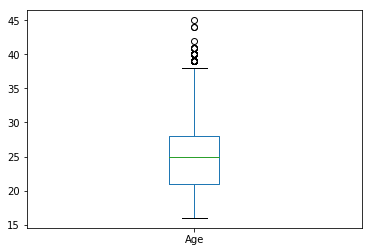

In [8]:
data1.plot(kind = "box")

- histogram

/home/vivianni/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


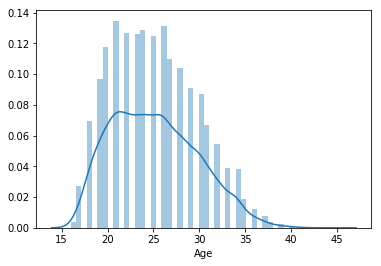

In [9]:
sns.distplot(data1['Age'])

## Distribusi yang digunakan adalah binomial distribution karena dilihat dari bentuk grafik. Untuk perhitungan dilakukan dengan pendekatan normal dengan pertimbangan jumlah data yang besar

## Answers

### 1. a (i) ekspektasi umur pemain bola yang berumur kurang dari 22 tahun

In [10]:
probability = norm(data1.mean(),data1.std()).cdf(22.5)
# total_data_less22 = data1[data1['Age']<22]['Age'].count()
total_person = probability[0]*1000 
# total = total_data_less22 / data['Age'].count() * 1000
# total
math.floor(total_person)

287

### 1. a (ii) ekspektasi umur pemain bola yang berumur lebih dari 44 tahun

In [11]:
probability = 1- norm(data1.mean(),data1.std()).cdf(40.5)
# total_data_more40 = data1[data1['Age']>40]['Age'].count()
total_person = probability[0]*1000
math.floor(total_person)

0

# Soal 2 - Crime

## Read CSV File

In [12]:
data2 = pd.read_csv('crime.csv', encoding = "ISO-8859-1", dtype={"SHOOTING": str, "OFFENSE_CODE": str, "REPORTING_AREA": object, "YEAR":int, "MONTH":int, "HOUR":int})
data2

INCIDENT_NUMBER OFFENSE_CODE               OFFENSE_CODE_GROUP  \
0           I182080058        02403               Disorderly Conduct   
1           I182080053        03201                    Property Lost   
2           I182080052        02647                            Other   
3           I182080051        00413               Aggravated Assault   
4           I182080050        03122                         Aircraft   
5           I182080049        01402                        Vandalism   
6           I182080048        03803  Motor Vehicle Accident Response   
7           I182080047        03301                  Verbal Disputes   
8           I182080045        00802                   Simple Assault   
9           I182080044        03410                            Towed   
10          I182080043        03803  Motor Vehicle Accident Response   
11          I182080042        00706                       Auto Theft   
12          I182080041        03006               Medical Assistance   
13          I182080040        03115               Investigate Person   
14          I182080039        03006               Medical Assistance   
15          I182080038        03831  Motor Vehicle Accident Response   
16          I182080037        02647                            Other   
17          I182080035        02647                            Other   
18          I182080034        03115               Investigate Person   
19          I182080031        03108             Fire Related Reports   
20          I182080030        03831  Motor Vehicle Accident Response   
21          I182080029        00613                          Larceny   
22          I182080028        03114             Investigate Property   
23          I182080027        03301                  Verbal Disputes   
24          I182080027        00619                          Larceny   
25          I182080026        02629                       Harassment   
26          I182080025        00311                          Robbery   
27          I182080024        01842                   Drug Violation   
28          I182080023        03115               Investigate Person   
29          I182080022        03006               Medical Assistance   
...                ...          ...                              ...   
327790   I110551302-00        03125                  Warrant Arrests   
327791   I110551302-00         0623                          Larceny   
327792   I110372326-00         0403               Aggravated Assault   
327793   I110372326-00        03125                  Warrant Arrests   
327794   I110261417-00        03125                  Warrant Arrests   
327795   I110261417-00         0619                          Larceny   
327796   I110177502-00        03125                  Warrant Arrests   
327797   I110177502-00         0802                   Simple Assault   
327798   I110177502-00         3125                  Warrant Arrests   
327799   I100636670-00         0629                          Larceny   
327800   I100636670-00        03125                  Warrant Arrests   
327801   I100340225-00        03125                  Warrant Arrests   
327802   I100340225-00         0339                          Robbery   
327803   I100222105-02        03125                  Warrant Arrests   
327804   I100033064-00        02907                       Violations   
327805   I100033064-00         2910                       Violations   
327806   I090321958-00        03125                  Warrant Arrests   
327807   I090321958-00         3125                  Warrant Arrests   
327808   I090317057-00         0403               Aggravated Assault   
327809   I090317057-00        03125                  Warrant Arrests   
327810   I080542626-00        03125                  Warrant Arrests   
327811   I080542626-00         1848                   Drug Violation   
327812   I080542626-00         1849                   Drug Violation   
327813   I060168073-00         1864            

## Data description

- mean
- standard deviation
- minimum value
- maximum value
- median

In [13]:
data2.describe()

YEAR          MONTH           HOUR            Lat  \
count  327820.000000  327820.000000  327820.000000  307188.000000   
mean     2016.598676       6.672213      13.114840      42.212995   
std         1.009775       3.253984       6.292714       2.173496   
min      2015.000000       1.000000       0.000000      -1.000000   
25%      2016.000000       4.000000       9.000000      42.297466   
50%      2017.000000       7.000000      14.000000      42.325552   
75%      2017.000000       9.000000      18.000000      42.348624   
max      2018.000000      12.000000      23.000000      42.395042   

                Long  
count  307188.000000  
mean      -70.906030  
std         3.515832  
min       -71.178674  
25%       -71.097081  
50%       -71.077493  
75%       -71.062482  
max        -1.000000

- mode

In [14]:
data2.mode(numeric_only = True)

YEAR  MONTH  HOUR        Lat       Long
0  2017      8    17  42.348624 -71.082776

- var

In [15]:
data2.var(numeric_only=True)

YEAR      1.019645
MONTH    10.588412
HOUR     39.598253
Lat       4.724085
Long     12.361074
dtype: float64

- skewness

In [16]:
data2.skew()

YEAR     -0.083805
MONTH    -0.119591
HOUR     -0.482938
Lat     -19.827352
Long     19.831624
dtype: float64

- kurtosis

In [17]:
data2.kurtosis()

YEAR      -1.090411
MONTH     -1.035742
HOUR      -0.600736
Lat      391.211516
Long     391.324226
dtype: float64

## Data plotting

In [18]:
# data["OFFENSE_CODE_GROUP"].value_counts()

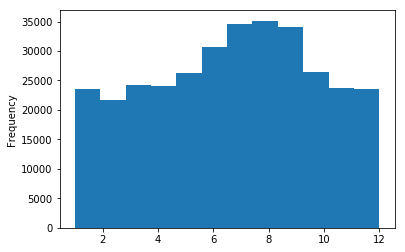

In [19]:
data2["MONTH"].plot.hist(bins = 12)

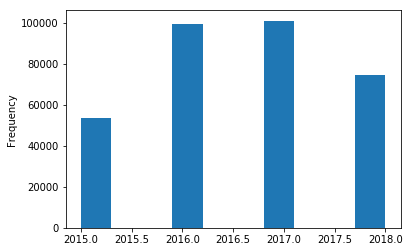

In [20]:
data2["YEAR"].plot(kind = "hist")

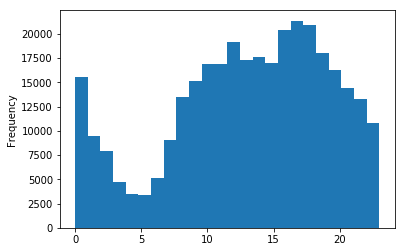

In [21]:
data2["HOUR"].plot(kind = "hist", bins = 24)

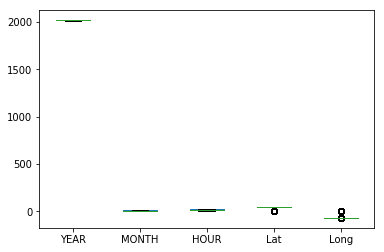

In [22]:
data2.plot.box()

### Data yang ada pada dataset merupakan data diskrit dan distribusi yang cocok adalah distribusi binomial atau hypergeometric. Dipilih distribusi binomial karena setiap datanya saling independent

## Answer

### 2. a (i) Jika terdapat 1000 kejahatan baru, ekspektasi kejahatan homicide adalah

In [23]:
￼
#total_homicide =  data2[data2["OFFENSE_CODE_GROUP"]=="Homicide"]['INCIDENT_NUMBER'].count()
probability_homicide = total_homicide / data2['INCIDENT_NUMBER'].count()
answer = probability_homicide*1000
math.floor(answer)

0

### 2. a (ii) Jika terdapat 1000 kejahatan baru tentukan ekspektasi kejahatan homicide tanpa shooting adalah

In [24]:
total_homicide_without_shooting =  total_homicide - data2[data2["OFFENSE_CODE_GROUP"]=="Homicide"]['SHOOTING'].count()
probability_homicide_without_shooting = total_homicide_without_shooting / data2['INCIDENT_NUMBER'].count()
answer = probability_homicide_without_shooting*1000
math.floor(answer)

0

### 2. a (iii) Jika terdapat 1000 kejahatan baru tentukan ekspektasi kejahatan homicide yang terjadi jam 20.00 pada hari Sabtu adalah

In [25]:
data_homicide = data2[data2["OFFENSE_CODE_GROUP"]=="Homicide"]
data_homicide_sat = data_homicide[data_homicide["DAY_OF_WEEK"]=="Saturday"]
data_homicide_sat_20 = data_homicide_sat[data_homicide_sat["HOUR"]==20]
probability = data_homicide_sat_20['INCIDENT_NUMBER'].count() / data2['INCIDENT_NUMBER'].count()
answer = probability*1000
math.floor(answer)

0

### 2. b (i) Jika terdapat 2000 kejahatan baru ekspektasi kejahatan yang terletak di Geneva Ave atau Prescott Street adalah


In [26]:
total_geneva_ave = data2[data2['STREET']=="GENEVA AVE"]
total_prescott_street = data2[data2['STREET']=="PRESCOTT ST"]
total_incident = total_geneva_ave['INCIDENT_NUMBER'].count() + total_prescott_street['INCIDENT_NUMBER'].count()
probability = total_incident / data2['INCIDENT_NUMBER'].count()
answer = probability*2000
math.floor(answer)

11

### 2. b (ii) Jika terdapat 2000 kejahatan baru ekspektasi kejahatan yang dilaporkan di kantor polisi nomor 495 dan District E18 adalah

In [27]:
total_495 = data2[data2['REPORTING_AREA']=='495']
total_495_E18 = total_495[total_495['DISTRICT']=='E18']
probability = total_495_E18['INCIDENT_NUMBER'].count() / data2['INCIDENT_NUMBER'].count()
answer = probability*2000
math.floor(answer)

3

### 2. b (iii) Jika terdapat 2000 kejahatan baru ekspektasi kejahatan yang tidak terjadi pada hari libur adalah

In [28]:
total_saturday = data2[data2['DAY_OF_WEEK'] == 'Saturday']
total_sunday = data2[data2['DAY_OF_WEEK'] == 'Sunday']
probability = (total_saturday['INCIDENT_NUMBER'].count() + total_sunday['INCIDENT_NUMBER'].count()) / data2['INCIDENT_NUMBER'].count()
answer = probability*2000
math.floor(answer)

532

# Soal 4 - Crypto

## Read CSV File

In [73]:
data4 = pd.read_csv('crypto.csv', header = None)
data4

0
0       0.000015
1       0.000023
2       0.000033
3       0.000037
4       0.000037
5       0.000037
6       0.000036
7       0.000073
8       0.000072
9       0.000073
10      0.000067
11      0.000069
12      0.000082
13      0.000113
14      0.000111
15      0.000112
16      0.000124
17      0.000124
18      0.000113
19      0.000109
20      0.000098
21      0.000090
22      0.000086
23      0.000085
24      0.000085
25      0.000084
26      0.000082
27      0.000081
28      0.000060
29      0.000037
...          ...
632188  0.113194
632189  0.087992
632190  0.101825
632191  0.334725
632192  0.690254
632193  0.625767
632194  0.230924
632195  0.114744
632196  0.089624
632197  0.143865
632198  0.112651
632199  0.126489
632200  0.145279
632201  0.132727
632202  0.126085
632203  0.225772
632204  0.129094
632205  0.228046
632206  0.323451
632207  0.073590
632208  0.074413
632209  0.061524
632210  0.130473
632211  0.211989
632212  0.070326
632213  0.045676
632214  0.057948
632215  0.082787
632216  0.091944
632217  0.089511

[632218 rows x 1 columns]

## Data Description

- mean
- standard deviation
- minimum value
- maximum value
- median

In [74]:
data4.describe()

0
count  6.322180e+05
mean   2.030181e+02
std    8.678734e+03
min    2.925000e-09
25%    8.070000e-04
50%    9.733500e-03
75%    1.198202e-01
max    2.383502e+06

- modus

In [75]:
data4.mode()

0
0  0.000002

- variansi

In [76]:
data4.var()

0    7.532042e+07
dtype: float64

- skewness

In [77]:
data4.skew()

0    118.239608
dtype: float64

- kurtosis

In [78]:
data4.kurtosis()

0    22297.470843
dtype: float64

## Data Plotting

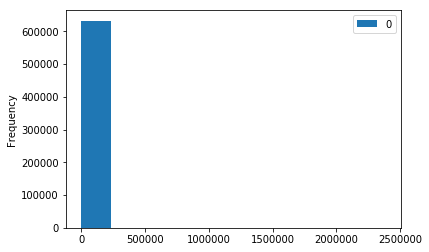

In [79]:
data4.plot.hist()

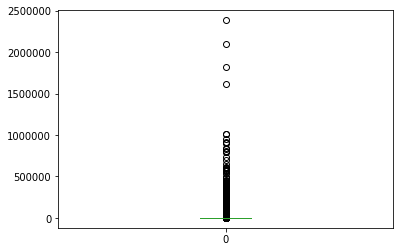

In [80]:
data4.plot.box()

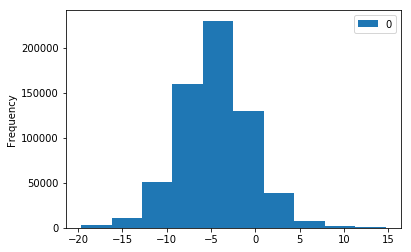

In [169]:
data4_log.plot.hist()

## Data dari dataset merupakan data kontinu. Distribusi yang digunakan adalah distribusi lognormal karena dari grafik yang diplot menyerupai distribusi lognormal

## Answer

In [155]:
# f = Fitter(data4, distributions = ['lognorm'])
# f.fit()
# f_param = f.fitted_param['lognorm']

Fitted lognorm distribution with error=1.7495203766284193e-09)


In [147]:
# f_param = lognorm.fit(data4)

In [166]:
# lognorm.cdf(0.01, *f_param)

In [159]:
data4_log = np.log(data4)

In [160]:
# beta = data4_log.var()/data4_log.mean()
# alpha = data4_log.mean() / beta

### 4 a. (i) Apabila hari ini terdapat 1000 data harga cryptocurrency baru, ekspektasi jumlah cryptocurrency yang nilainya kurang dari 0.177013 adalah

In [170]:
probability = norm(data4_log.mean(),data4_log.std()).cdf(np.log(0.177013))
answer = probability[0]*1000
round(answer)

767.0

### 4 a. (ii) Apabila hari ini terdapat 1000 data harga cryptocurrency baru, ekspektasi jumlah cryptocurrency yang nilainya lebih dari 177.013 adalah

In [171]:
probability = 1- norm(data4_log.mean(),data4_log.std()).cdf(np.log(177.013))
answer = probability[0]*1000
round(answer)

7.0

### 4 b (i) Jika suatu hari terdapat sebuah cryptocurrency baru, tentukan peluang cryptocurrency  tersebut bernilai lebih dari 0.013

In [164]:
probability = 1- norm(data4_log.mean(),data4_log.std()).cdf(np.log(0.013))
probability[0]

0.4724174695697392

### 4 b (i) Jika suatu hari terdapat sebuah cryptocurrency baru, tentukan peluang cryptocurrency tersebut bernilai kurang dari 17.7

In [165]:
probability = norm(data4_log.mean(),data4_log.std()).cdf(np.log(17.7))
probability[0]

0.970672397230195

# Soal 5 - Athletes

## Read CSV file

In [ ]:
data5 = pd.read_csv('athletes.csv')
data5

## Data description

- mean
- standard deviation
- minimum value
- maximum value
- median

In [44]:
data5.describe()

Medal
count  134731.000000
mean        0.295277
std         0.724716
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        28.000000

- modus

In [45]:
data5.mode(numeric_only = True)

Medal
0      0

- variance

In [113]:
￼
#data5.var()

Medal    0.525213
dtype: float64

- skewness

In [46]:
data5.skew()

Medal    4.819999
dtype: float64

- kurtosis

In [47]:
data5.kurtosis()

Medal    51.562526
dtype: float64

## Data Plotting

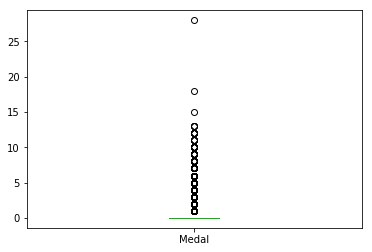

In [48]:
data5.plot(kind = 'box')

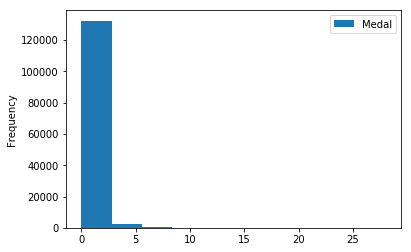

In [49]:
data5.plot.hist()

## Answer

In [127]:
# f = Fitter(data5['Medal'], distributions = ['expon'])
# f.fit()
# fparam = f.fitted_param['expon']

### 5 a.(i) Peluang Y meraih 0 medali adalah

In [104]:
# expon.pdf(0,loc=fparam[0], scale=fparam[1])

In [105]:
total_zero = data5[data5['Medal']==0]
probability = total_zero['Name'].count()
answer = probability/data5['Name'].count()
answer

0.7906792052311643

### 5 a. (ii) Peluang Y meraih lebih dari 10 medali adalah

In [106]:
# expon.pdf(10,loc=fparam[0], scale=fparam[1])

### Data yang ada pada dataset merupakan data diskrit dan distribusi yang cocok adalah distribusi binomial atau hypergeometric. Dipilih distribusi binomial karena setiap datanya saling independent

In [ ]:
total_ten = data5[data5['Medal']>10]
probability = total_ten['Name'].count()
answer = probability/data5['Name'].count()
answer

### 5 a. (iii) Peluang Y meraih tepat 3 medali adalah

In [108]:
# expon.pdf(2,loc=fparam[0], scale=fparam[1]) - expon.pdf(3,loc=fparam[0], scale=fparam[1])

In [109]:
total_three = data5[data5['Medal']==3]
probability = total_three['Name'].count()
answer = probability/data5['Name'].count()
answer

0.01027974259821422

### 5 a. (iv) Peluang Y meraih 1 sampai 5 medali adalah

In [110]:
# expon.pdf(1,loc=fparam[0], scale=fparam[1]) - expon.pdf(5,loc=fparam[0], scale=fparam[1])

In [111]:
total_zero = data5[data5['Medal']==0]
total_five = data5[data5['Medal']<=5]
probability = total_five['Name'].count() - total_zero['Name'].count()
answer = probability/data5['Name'].count()
answer

0.207339068217411

### 5 b. Confidence Interval 95%

In [125]:
# z0.025 = 1.96
error = 1.96 * data5['Medal'].std() / np.sqrt(data5['Medal'].count())
bottom = data5['Medal'].mean() - error
top = data5['Medal'].mean() + error
print(bottom , "< μ <" , top)

0.29140744161222804 < μ < 0.29914707071232977
